In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("imr90.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,234.12,220.79,63.62,266.68,112.82,111.96,123.50,99.03,100.86,133.53,161.46,176.78
1,533.82,320.78,689.31,35.60,620.46,391.48,494.13,1058.12,741.95,632.86,50.97,434.71
2,377.27,343.40,161.19,351.62,91.89,167.79,212.51,390.74,125.53,264.96,114.50,183.55
3,480.39,263.90,457.97,49.37,273.88,278.30,311.26,403.46,263.33,418.95,60.57,159.78
4,155.38,173.76,9.30,88.46,57.45,27.39,24.96,25.00,58.80,45.00,412.52,98.73
...,...,...,...,...,...,...,...,...,...,...,...,...
7615,270.91,171.93,16.73,236.21,79.45,40.82,40.08,12.28,86.94,74.14,141.00,126.20
7616,354.15,116.02,63.19,122.07,364.12,78.87,47.67,25.40,132.95,61.24,101.70,212.91
7617,32.89,10.11,0.00,22.89,1.40,1.30,3.12,2.19,8.56,3.16,42.00,19.99
7618,425.02,254.28,418.93,130.67,456.39,246.21,290.88,509.75,374.09,369.29,281.89,233.89


In [5]:
normalized_features = Normalizer().fit_transform(features)

In [6]:
normalized_features = pd.DataFrame(normalized_features) 

In [7]:
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 

In [8]:
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.417558,0.393783,0.113468,0.475629,0.201217,0.199683,0.220265,0.176622,0.179886,0.238153,0.287967,0.315291
1,0.270004,0.162249,0.348650,0.018006,0.313826,0.198009,0.249929,0.535192,0.375275,0.320098,0.025780,0.219874
2,0.427978,0.389556,0.182855,0.398880,0.104241,0.190342,0.241073,0.443258,0.142402,0.300573,0.129890,0.208220
3,0.438758,0.241030,0.418281,0.045091,0.250145,0.254182,0.284285,0.368495,0.240509,0.382643,0.055321,0.145933
4,0.308943,0.345489,0.018491,0.175886,0.114228,0.054460,0.049628,0.049708,0.116913,0.089474,0.820217,0.196306
...,...,...,...,...,...,...,...,...,...,...,...,...
7615,0.580724,0.368550,0.035863,0.506341,0.170309,0.087502,0.085916,0.026323,0.186365,0.158927,0.302248,0.270523
7616,0.577096,0.189057,0.102970,0.198916,0.593343,0.128521,0.077679,0.041390,0.216645,0.099792,0.165723,0.346942
7617,0.521804,0.160396,0.000000,0.363152,0.022211,0.020625,0.049499,0.034745,0.135805,0.050134,0.666335,0.317144
7618,0.351541,0.210319,0.346504,0.108079,0.377488,0.203644,0.240592,0.421622,0.309416,0.305446,0.233156,0.193454


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(normalized_features, normalized_features))

[[1.         0.69750816 0.93319766 ... 0.8076413  0.82095187 0.71486056]
 [0.69750816 1.         0.81636128 ... 0.36939478 0.95879935 0.67573007]
 [0.93319766 0.81636128 1.         ... 0.65122636 0.86828858 0.59685959]
 ...
 [0.8076413  0.36939478 0.65122636 ... 1.         0.56960758 0.52883964]
 [0.82095187 0.95879935 0.86828858 ... 0.56960758 1.         0.78974704]
 [0.71486056 0.67573007 0.59685959 ... 0.52883964 0.78974704 1.        ]]


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


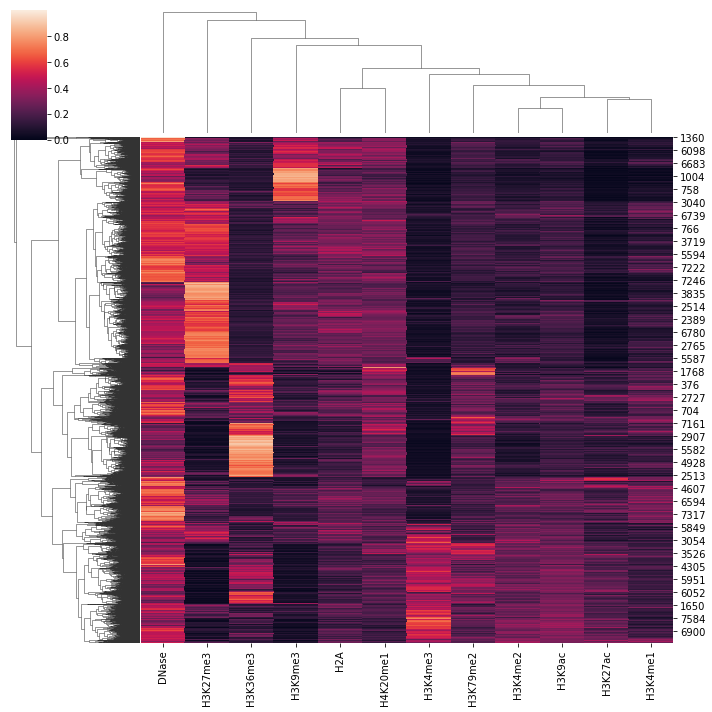

In [10]:
import seaborn as sns 

sns.clustermap(normalized_features)

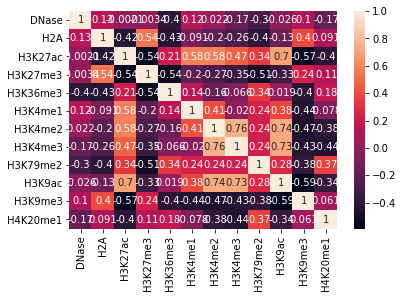

In [11]:
# generating correlation heatmap 
sns.heatmap(normalized_features.corr(), annot = True) 

plt.show() 

## Silhouette coefficient

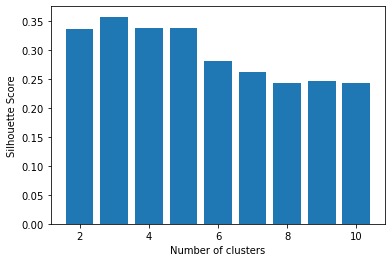

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [13]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [14]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=3, random_state=12)

In [15]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

927.2801268663893
[[0.38194879 0.18029905 0.15434011 0.09692247 0.61671422 0.19919842
  0.13194794 0.07407663 0.28922567 0.18111976 0.128189   0.3286601 ]
 [0.47113645 0.19888697 0.23776961 0.12687245 0.23384292 0.19695144
  0.27733692 0.3895669  0.27029636 0.29893548 0.09276136 0.21085807]
 [0.49716014 0.29483022 0.07746332 0.46998585 0.13495359 0.14450892
  0.14008031 0.07451592 0.16516474 0.16621981 0.33710838 0.28474843]]
8


In [16]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

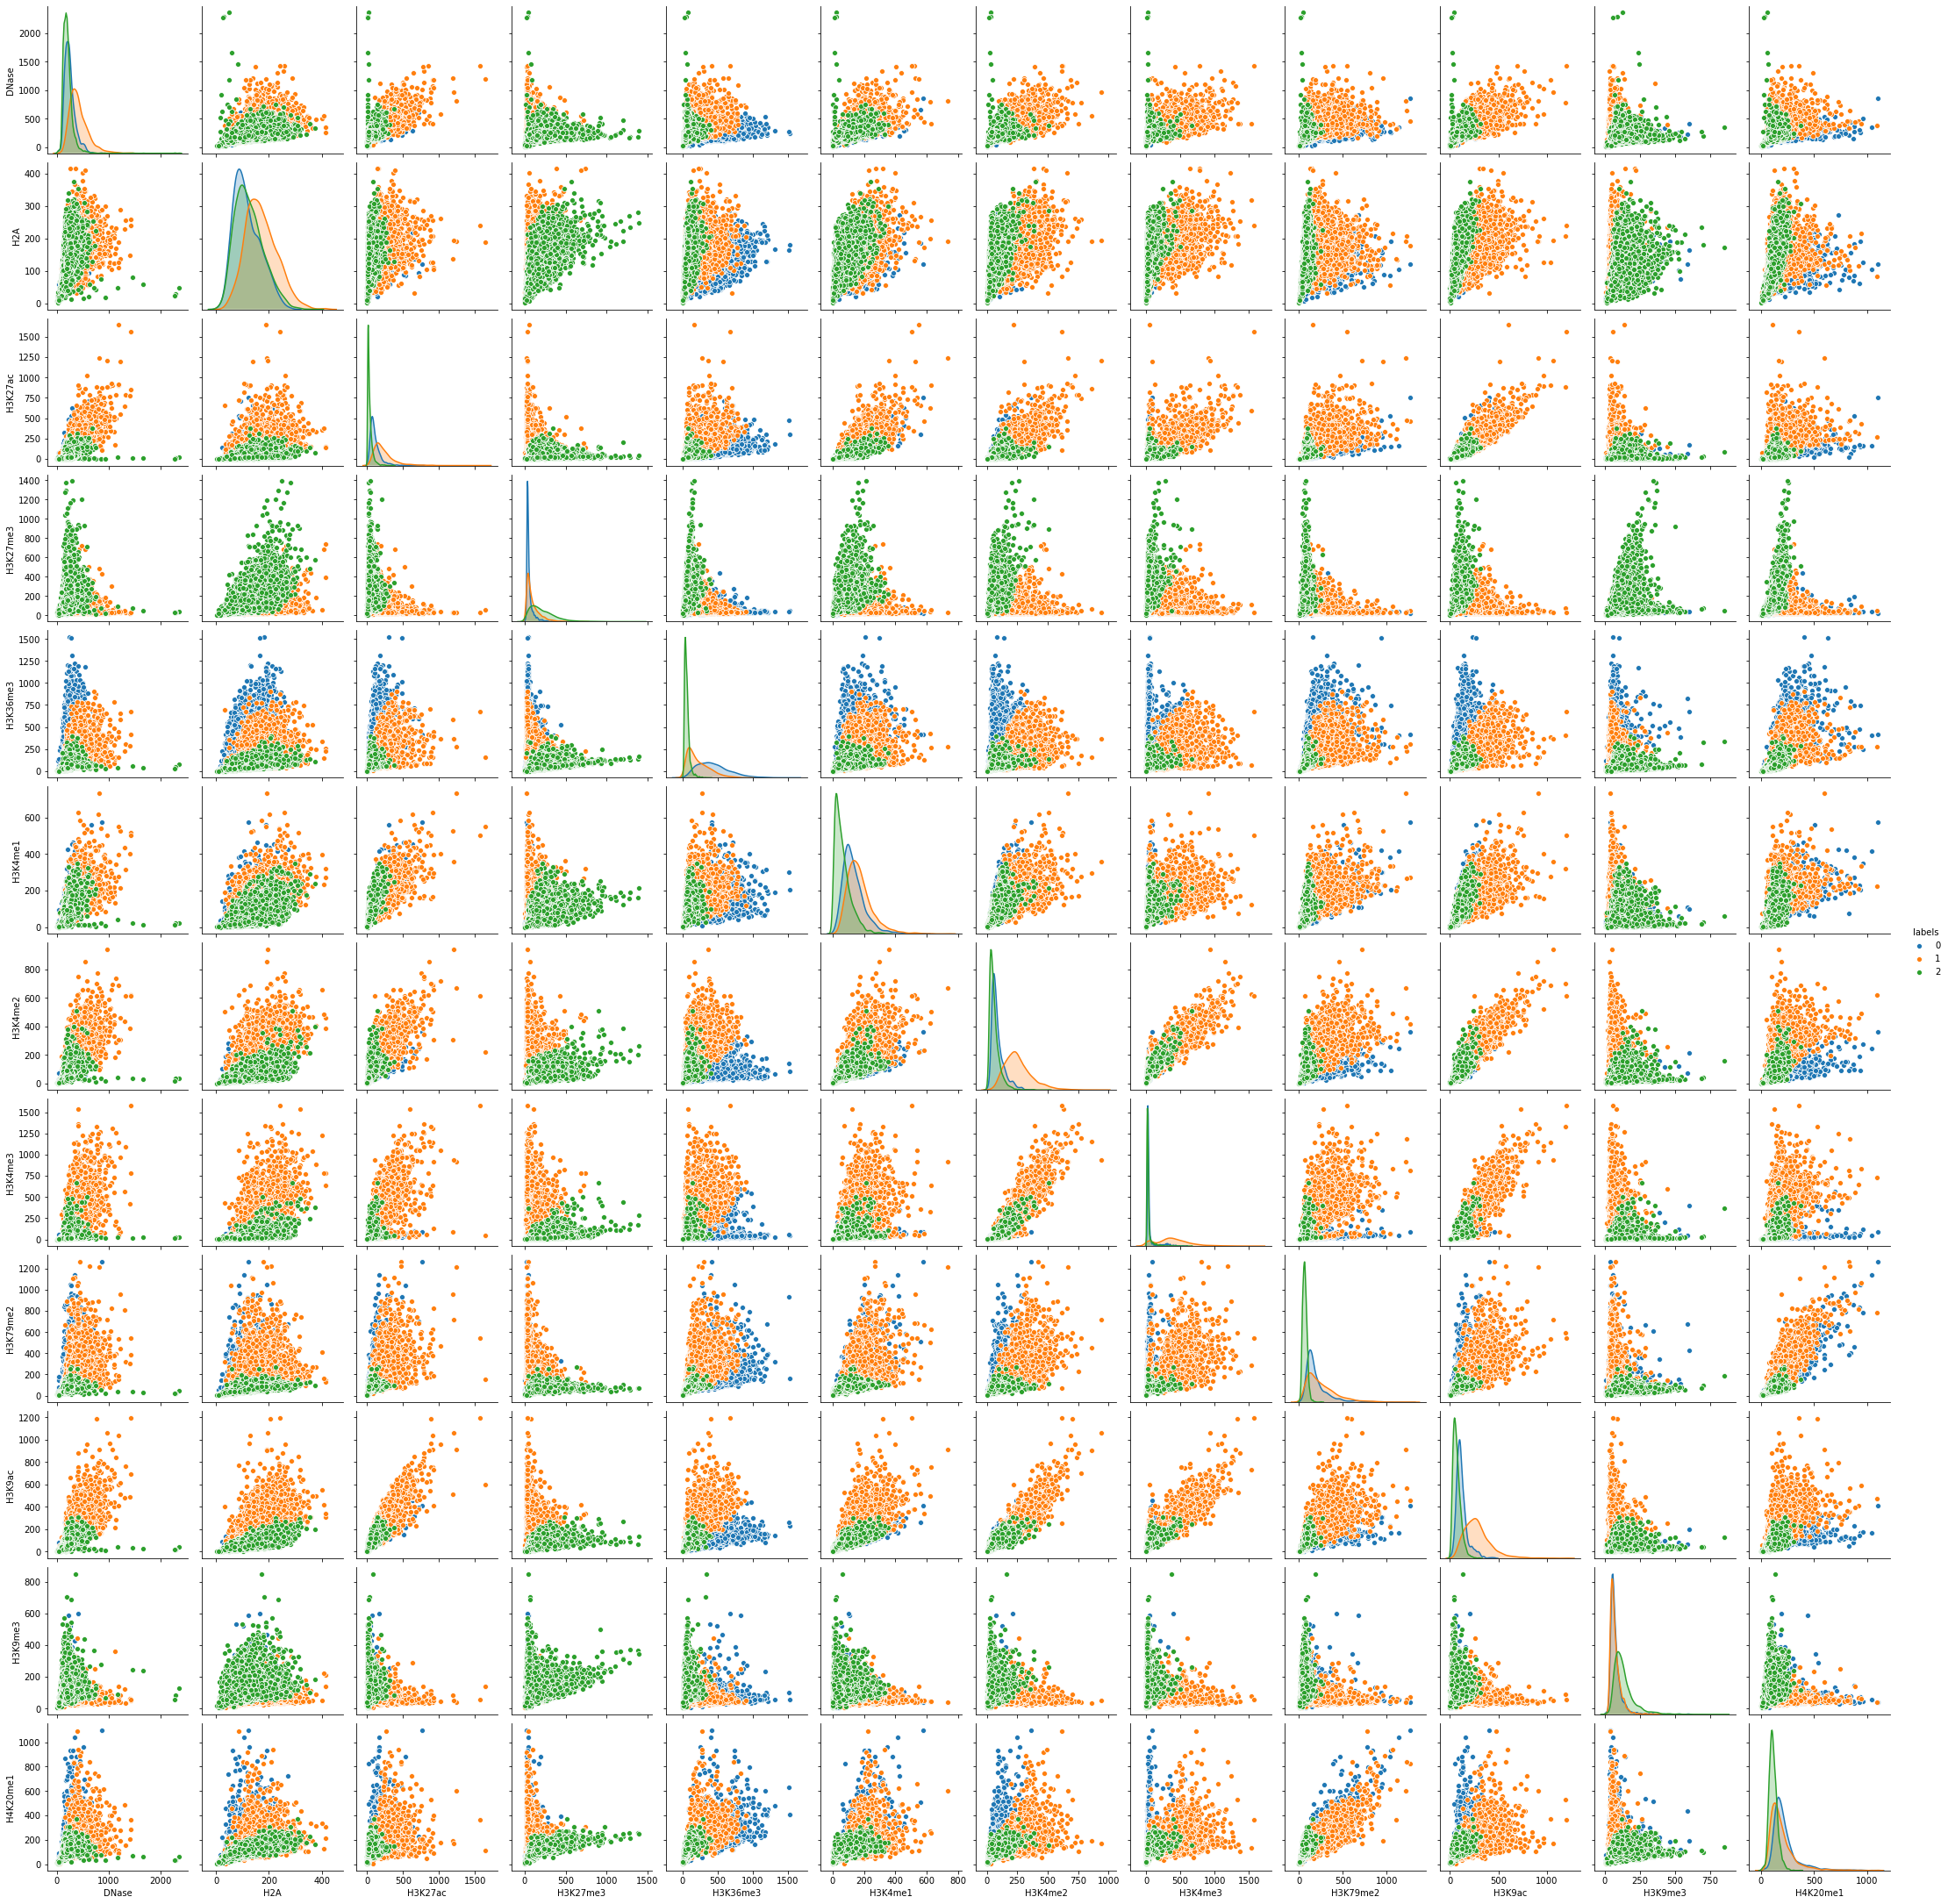

In [17]:
sns.pairplot(labeled,hue='labels')